In [1]:
import os
import ROOT
from ROOT import gStyle
import ctypes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def biner(o_bin,m_bin,f_bin,f_step,l_step):
    a=np.arange(o_bin,m_bin,f_step)
    b=np.arange(m_bin,f_bin+l_step,l_step)
    return np.concatenate((a,b))

def normalization(hist_list,norm_bin):
    for hist in hist_list:
        for i in range(1,hist.GetNbinsX()+1):
            value=hist.GetBinContent(i)
            error=hist.GetBinError(i)
            sf=hist.GetBinWidth(i)/norm_bin
            hist.SetBinContent(i,value/sf)
            hist.SetBinError(i,error/sf)


def ratio_subtracted_plot(path_to_samples=os.getcwd(),signal_name="Signal",data_name="Data",bg_names=[],histogram_info=None):
    
    MC = ROOT.TFile.Open(path_to_samples+"/"+"MC"+".root","READ")
    Data = ROOT.TFile.Open(path_to_samples+"/"+data_name+".root","READ")
    Signal = ROOT.TFile.Open(path_to_samples+"/"+signal_name+".root","READ")
    
    bg_files_list=[]
    for i in bg_names:
        bg_files_list.append(ROOT.TFile.Open(path_to_samples+"/"+i+".root","READ"))
    
    histogram_name = list(histogram_info.keys())[0]

    mc=MC.Get(histogram_name)
    data=Data.Get(histogram_name)
    signal=Signal.Get(histogram_name)
    
    bg_histograms_list = [i.Get(histogram_name) for i in bg_files_list]
    
    
    mc.SetDirectory(0)
    signal.SetDirectory(0)
    data.SetDirectory(0)
    
    for i in bg_histograms_list:
        i=i.SetDirectory(0)
    
    MC.Close()
    Signal.Close()
    Data.Close()

    [i.Close() for i in bg_files_list]
    
    s=data.GetXaxis().GetBinLowEdge(1)
    e=data.GetXaxis().GetBinUpEdge(data.GetNbinsX())
    

    s=data.GetXaxis().GetBinLowEdge(1)
    e=data.GetXaxis().GetBinUpEdge(data.GetNbinsX())
    rebining=biner(s,histogram_info[histogram_name][0],e,histogram_info[histogram_name][1],histogram_info[histogram_name][2])
    nb=len(rebining)-1
    mc=mc.Rebin(nb,"mc",rebining)
    signal=signal.Rebin(nb,"signal",rebining)
    data=data.Rebin(nb,"data",rebining)
    for i in range(0,len(bg_histograms_list)):
        bg_histograms_list[i]=bg_histograms_list[i].Rebin(nb,bg_names[i],rebining)

    if len(histogram_info[histogram_name])>0:
        hist_list=[signal,data,mc]+bg_histograms_list
        normalization(hist_list,histogram_info[histogram_name][1])
        
    data_subtracted=data.Clone()
    for i in bg_histograms_list:
        data_subtracted.Add(i,-1)
        
        
    ratio=data_subtracted.Clone()
    ratio.Divide(signal)
    
    ###################################################################################################
    
    #######                              Plotting part                                     ############
    
    ###################################################################################################
    
    
    
    gStyle.SetOptStat(1111111)
    gStyle.SetStatY(0.97);                
    gStyle.SetStatX(1.0);
    gStyle.SetStatW(0.12);                
    gStyle.SetStatH(0.12);

    canvas3 = ROOT.TCanvas("canvas3")
    canvas3.cd()

    ##### DRAWING TOP PAD, SETTING MARGINS #######

    pad1 = ROOT . TPad (" pad1 "," pad1 " ,0 ,0.35 ,1 ,1)
    pad1.SetTopMargin(0.03)
    pad1.SetRightMargin(0.03)
    pad1.SetLeftMargin(0.08)
    pad1.SetBottomMargin(0.0)
    pad1.Draw ()
    pad1.cd ()

    ###### SETTING STATS BOX POSITION ######

    gStyle.SetStatY(0.93);                
    gStyle.SetStatX(0.99);
    gStyle.SetStatW(0.1);                
    gStyle.SetStatH(0.1);
    
    data_subtracted.SetLineColor(ROOT.kRed)

    data_subtracted.Draw("pe")
    signal.Draw("HIST same")
    data_subtracted.Draw("same")

    pad1.SetLogy()


    data . GetYaxis (). SetRangeUser (1 ,10*data.GetBinContent(data.GetMaximumBin()))

    legend = ROOT . TLegend (0.45 ,0.80 ,0.85 ,0.95)
    legend . AddEntry ( data ," Data subtracted")
    legend . AddEntry ( signal ,signal_name)
    gStyle.SetLegendBorderSize(0)
    legend . SetLineWidth (0)
    legend . Draw ()

    data.SetTitle("")
    l=ROOT.TLatex()
    l.SetNDC ()
    l.DrawLatex(0.9,0.7,"Z#rightarrow #mu#mu")

    canvas3.cd()
    pad2 = ROOT . TPad (" pad2 "," pad2 " ,0 ,0.15 ,1 ,0.35)
    pad2.SetRightMargin(0.03)
    pad2.SetLeftMargin(0.08)
    pad2.SetTopMargin(0)
    pad2.SetBottomMargin(0.0)
    pad2.Draw ()
    pad2.cd ()
    ratio.Draw ("pe")
    ratio.SetTitle("")
    ratio.SetStats(0)
    ratio . GetYaxis (). SetRangeUser (0.1 ,2.0)
    ratio . GetXaxis (). SetRangeUser (s ,e)
    ratio . GetYaxis (). SetTitle ("MC/DATA")
    ratio . GetYaxis (). SetTitleSize (0.15)
    ratio . GetYaxis (). SetTitleOffset (0.25)
    #ratio . GetXaxis (). SetTitle (histos[i][3])
    ratio . GetXaxis (). SetTitleSize (0.09)
    ratio.GetXaxis().SetLabelSize(0.10)
    ratio.GetYaxis().SetLabelSize(0.08)


    ###### SETTING ALL THE HORIZONTAL DASHED LINES #######

    line = ROOT . TLine (s ,1 ,e,1)
    line . SetLineColor ( ROOT . kBlack )
    line . SetLineWidth (2)
    line2 = ROOT . TLine (s ,1.2 ,e,1.2)
    line2 . SetLineColor ( ROOT . kBlack )
    line2 . SetLineWidth (1)
    line2 . SetLineStyle(2)
    line3 = ROOT . TLine (s ,0.8 ,e,0.8)
    line3 . SetLineColor ( ROOT . kBlack )
    line3 . SetLineWidth (1)
    line3 . SetLineStyle(2)
    line4 = ROOT . TLine (s ,1.4 ,e,1.4)
    line4 . SetLineColor ( ROOT . kBlack )
    line4 . SetLineWidth (1)
    line4 . SetLineStyle(2)
    line5 = ROOT . TLine (s ,0.6 ,e,0.6)
    line5 . SetLineColor ( ROOT . kBlack )
    line5 . SetLineWidth (1)
    line5 . SetLineStyle(2)
    line6 = ROOT . TLine (s ,1.6 ,e,1.6)
    line6 . SetLineColor ( ROOT . kBlack )
    line6 . SetLineWidth (1)
    line6 . SetLineStyle(2)
    line7 = ROOT . TLine (s ,0.4 ,e,0.4)
    line7 . SetLineColor ( ROOT . kBlack )
    line7 . SetLineWidth (1)
    line7 . SetLineStyle(2)
    line8 = ROOT . TLine (s ,1.8 ,e,1.8)
    line8 . SetLineColor ( ROOT . kBlack )
    line8 . SetLineWidth (1)
    line8 . SetLineStyle(2)
    line9 = ROOT . TLine (s ,0.2 ,e,0.2)
    line9 . SetLineColor ( ROOT . kBlack )
    line9 . SetLineWidth (1)
    line9 . SetLineStyle(2)
    line . Draw (" same ")
    line2 . Draw (" same ")
    line3 . Draw (" same ")
    line4 . Draw (" same ")
    line5 . Draw (" same ")
    line6 . Draw (" same ")
    line7 . Draw (" same ")
    line8 . Draw (" same ")
    line9 . Draw (" same ")
    line . Draw (" same ")
    
    x_values = []
    y_values = []
    y_uncern = []

    for i in range(1,ratio.GetNbinsX()+1):
        print("m range = ",ratio.GetBinLowEdge(i),"SF = ",round(ratio.GetBinContent(i),3),)
        
        x_values.append(ratio.GetBinCenter(i))
        y_values.append(round(ratio.GetBinContent(i),3))
        y_uncern.append(ratio.GetBinError(i))

    x_values.append(3500.0)
    y_values.append(round(ratio.GetBinContent(ratio.GetNbinsX()+1),3))
    y_uncern.append(round(ratio.GetBinError(ratio.GetNbinsX()+1),3))

    os.chdir(path_to_samples)
    sufix = signal_name.strip('.root').split('_')[1]
    canvas3.Print(sufix+"_ratio.pdf")
    
    return [x_values,y_values,y_uncern]

Welcome to JupyROOT 6.24/06


m range =  0.0 SF =  0.985
m range =  250.0 SF =  0.835
m range =  500.0 SF =  0.8
m range =  750.0 SF =  0.671
m range =  1000.0 SF =  0.592
m range =  1250.0 SF =  0.71
m range =  1500.0 SF =  0.698
m range =  2000.0 SF =  0.894
m range =  2500.0 SF =  1.529
FIT PARAMETERS
[-2.80217136e-04  9.57600250e-01] 

S(m) =  1.1457046327969453e-05 S(c) =  0.034239136847790494 Cov(m,c) -3.562007213554848e-07
% Sigma(m) =  4.09 % Sigma(c) =  3.58


Info in <TCanvas::Print>: pdf file MG_ratio.pdf has been created


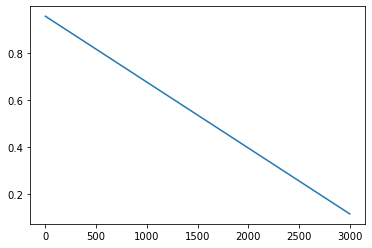

In [9]:

path = "/home/diego/HEP/VBF-Analysis/Zee/Plots/CRb"
signal = "Zee_MG"

histo={
"mass_jj":[1500,250,500],
}

hola=ratio_subtracted_plot(path_to_samples=path,signal_name=signal,data_name="Data",bg_names=["Signal_Sherpa","VV","Wjets","ttbar","singletop"],histogram_info=histo)

fit,c = np.polyfit(hola[0][1:],hola[1][1:],1,w=1/np.array(hola[2][1:]),cov='unscaled')
print("FIT PARAMETERS")
print(fit,"\n")

print("S(m) = ",np.sqrt(c[0][0]),"S(c) = ",np.sqrt(c[1][1]),"Cov(m,c)",c[1][0])

print("% Sigma(m) = ",round(abs(100*np.sqrt(c[0][0])/fit[0]),2),"% Sigma(c) = ",round(abs(100*np.sqrt(c[1][1])/fit[1]),2))

x=np.linspace(0,3000,13)
y=fit[0]*x+fit[1]

plt.plot(x,y)